<a href="https://colab.research.google.com/github/byfurkation/Allura_store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [36]:
# Paso 1: Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar el estilo de los gráficos
plt.style.use('default')
sns.set_palette("husl")

# Paso 2: Cargar los datos
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar los datos
tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

In [37]:
# Paso 3: Explorar los datos
tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [38]:
print("\nInformación de las columnas:")
print(tienda1.info())


Información de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
None


#1. Análisis de facturación



En este primer análisis, debes **calcular el ingreso total de cada tienda**. Sumando los valores de la **columna Precio** de cada conjunto de datos de la tienda para **estimar los ingresos.**

In [39]:
#CALCULAR EL INGRESO TOTAL DE CADA TIENDA
# Sumar todos los valores de la columna "Precio" para cada tienda

# Tienda1
ingreso_tienda1 = tienda1['Precio'].sum()
print(f"\n=== RESULTADOS DE INGRESOS ===")
print(f"Ingreso total Tienda 1: ${ingreso_tienda1:,.2f}")

# Tienda 2
ingreso_tienda2 = tienda2['Precio'].sum()
print(f"Ingreso total Tienda 2: ${ingreso_tienda2:,.2f}")

# Tienda 3
ingreso_tienda3 = tienda3['Precio'].sum()
print(f"Ingreso total Tienda 3: ${ingreso_tienda3:,.2f}")

# Tienda 4
ingreso_tienda4 = tienda4['Precio'].sum()
print(f"Ingreso total Tienda 4: ${ingreso_tienda4:,.2f}")


=== RESULTADOS DE INGRESOS ===
Ingreso total Tienda 1: $1,150,880,400.00
Ingreso total Tienda 2: $1,116,343,500.00
Ingreso total Tienda 3: $1,098,019,600.00
Ingreso total Tienda 4: $1,038,375,700.00


In [40]:
#Crear un resumen
# Crear un DataFrame con los resultados para mejor visualización
resumen_ingresos = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso_Total': [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
    })

# Se da formato a la colmna 'Ingreso_Total' como un string con moneda y comas.
resumen_ingresos['Ingreso_Total'] = resumen_ingresos['Ingreso_Total'].apply(lambda x: f"$ {x:,.2f}")


print("\n=== RESUMEN DE INGRESOS POR TIENDA ===")
print(resumen_ingresos)


=== RESUMEN DE INGRESOS POR TIENDA ===
     Tienda       Ingreso_Total
0  Tienda 1  $ 1,150,880,400.00
1  Tienda 2  $ 1,116,343,500.00
2  Tienda 3  $ 1,098,019,600.00
3  Tienda 4  $ 1,038,375,700.00


# 2. Ventas por categoría

En este debes calcular la **cantidad de productos vendidos por categoría en cada tienda**. La idea es agrupar los datos por categoría y **contar el número de ventas de cada tipo**, mostrando las **categorías más populares de cada tienda.**

In [41]:
# Contar ventas por categoría en cada tienda
ventas_cat_t1 = tienda1['Categoría del Producto'].value_counts()
ventas_cat_t2 = tienda2['Categoría del Producto'].value_counts()
ventas_cat_t3 = tienda3['Categoría del Producto'].value_counts()
ventas_cat_t4 = tienda4['Categoría del Producto'].value_counts()

print("Ventas por categoría - Tienda 1:")
print(ventas_cat_t1)
print()

print("Ventas por categoría - Tienda 2:")
print(ventas_cat_t2)
print()

print("Ventas por categoría - Tienda 3:")
print(ventas_cat_t3)
print()

print("Ventas por categoría - Tienda 4:")
print(ventas_cat_t4)
print()

Ventas por categoría - Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Ventas por categoría - Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Ventas por categoría - Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64

Ventas 

# 3. Calificación promedio de la tienda


En este paso, debes calcular las **calificaciones promedio de los clientes para cada tienda**. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [42]:
# Calcular calificación promedio por tienda
calif_promedio_t1 = tienda1['Calificación'].mean()
print(calif_promedio_t1)
calif_promedio_t2 = tienda2['Calificación'].mean()
print(calif_promedio_t2)
calif_promedio_t3 = tienda3['Calificación'].mean()
print(calif_promedio_t3)
calif_promedio_t4 = tienda4['Calificación'].mean()
print(calif_promedio_t4)

3.976685036032217
4.037303942348453
4.048325561678677
3.9957591178965224


In [43]:
#Crear un resumen
# Crear un DataFrame con los resultados para mejor visualización
calificaciones_resumen = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificacion_Promedio': [calif_promedio_t1, calif_promedio_t2,
                             calif_promedio_t3, calif_promedio_t4]
    })
print(calificaciones_resumen)

     Tienda  Calificacion_Promedio
0  Tienda 1               3.976685
1  Tienda 2               4.037304
2  Tienda 3               4.048326
3  Tienda 4               3.995759


In [44]:
for i, row in calificaciones_resumen.iterrows():
    print(f"{row['Tienda']}: {row['Calificacion_Promedio']:.2f}")

Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


# 4. Productos más y menos vendidos

En este paso, debes identificar qué **productos fueron los más vendidos** y los **menos vendidos en cada tienda**. *Visualiza* los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [45]:
def analizar_productos_vendidos(df, nombre_tienda):
    productos_vendidos = df['Producto'].value_counts()
    print(f"\n{nombre_tienda}:")
    print("Productos más vendidos:")
    print(productos_vendidos.head(3))
    print("Productos menos vendidos:")
    print(productos_vendidos.tail(3))
    return productos_vendidos

# Analizar cada tienda
productos_t1 = analizar_productos_vendidos(tienda1, "Tienda 1")
productos_t2 = analizar_productos_vendidos(tienda2, "Tienda 2")
productos_t3 = analizar_productos_vendidos(tienda3, "Tienda 3")
productos_t4 = analizar_productos_vendidos(tienda4, "Tienda 4")


Tienda 1:
Productos más vendidos:
Producto
Microondas       60
TV LED UHD 4K    60
Armario          60
Name: count, dtype: int64
Productos menos vendidos:
Producto
Olla de presión              35
Auriculares con micrófono    33
Celular ABXY                 33
Name: count, dtype: int64

Tienda 2:
Productos más vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Name: count, dtype: int64
Productos menos vendidos:
Producto
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

Tienda 3:
Productos más vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Name: count, dtype: int64
Productos menos vendidos:
Producto
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64

Tienda 4:
Productos más vendidos:
Producto
Cama box                   62
Cubertería                 59
Dashboards con Power BI    56

# 5. Envío promedio por tienda

En este paso, debes calcular el costo de envío promedio para cada tienda.**texto en negrita** El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [46]:
# Calcular costo de envío promedio por tienda
envio_promedio_t1 = tienda1['Costo de envío'].mean()
envio_promedio_t2 = tienda2['Costo de envío'].mean()
envio_promedio_t3 = tienda3['Costo de envío'].mean()
envio_promedio_t4 = tienda4['Costo de envío'].mean()

envios_resumen = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo_Envio_Promedio': [envio_promedio_t1, envio_promedio_t2,
                            envio_promedio_t3, envio_promedio_t4]
})

print("Costos de envío promedio:")
for i, row in envios_resumen.iterrows():
    print(f"{row['Tienda']}: ${row['Costo_Envio_Promedio']:.2f}")

Costos de envío promedio:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


#VISUALIZACIONES

# Visualización de ingresos totales

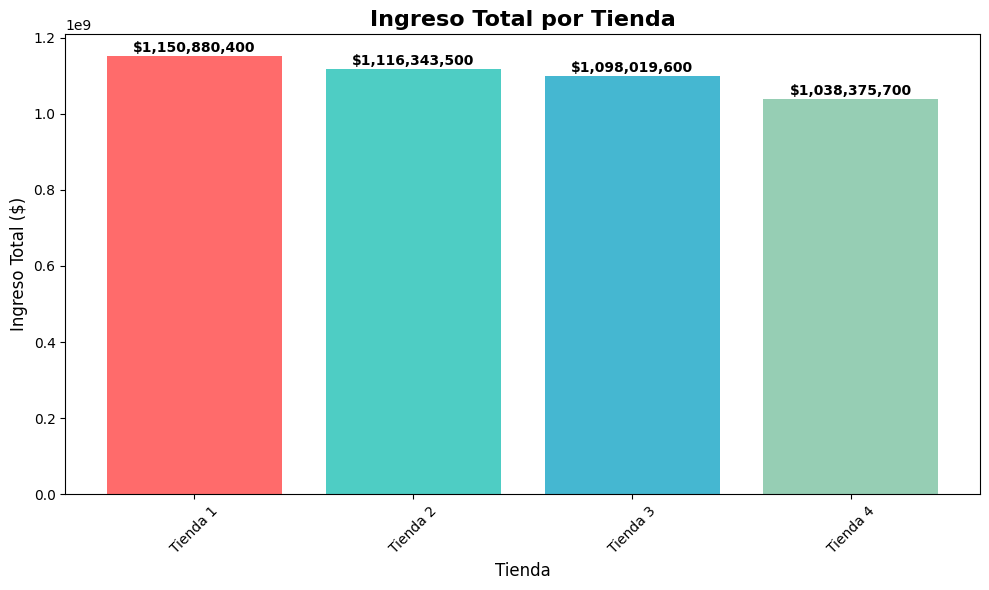

In [52]:
plt.figure(figsize=(10, 6))

# Antes de formatear resumen_ingresos['Ingreso_Total'] como cadena
# se Accede a los valores numéricos para graficar
ingresos_numericos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]

plt.bar(resumen_ingresos['Tienda'], ingresos_numericos,
        color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
plt.title('Ingreso Total por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingreso Total ($)', fontsize=12)
plt.xticks(rotation=45)

# Iterar a través de las filas del DataFrame y los valores numéricos para
# agregar etiquetas de texto
for index, row in resumen_ingresos.iterrows():
    # Utilice el valor numérico para el cálculo y el formato para la visualización.
    plt.text(index, ingresos_numericos[index] + max(ingresos_numericos) * 0.01, # Utilice el valor numérico y el máximo de valores numéricos

             f'${ingresos_numericos[index]:,.0f}', # Formatear el valor numérico para la etiqueta de texto
             ha='center', fontweight='bold')

plt.tight_layout()
plt.show()
